Student Number:


,StudentCount
0,218


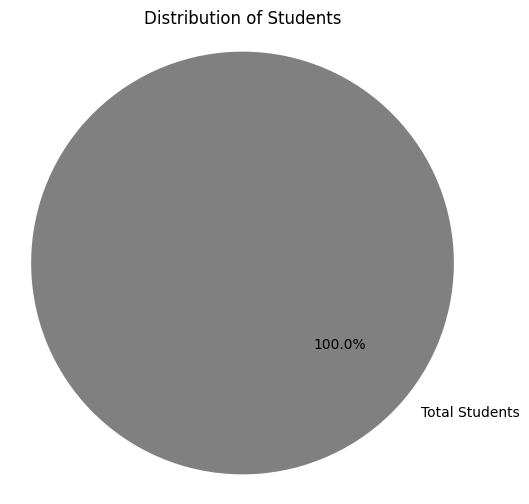


Student Count by Year:


,EnrollmentYear,StudentCount
0,2018,43
1,2019,44
2,2020,44
3,2021,44
4,2022,43


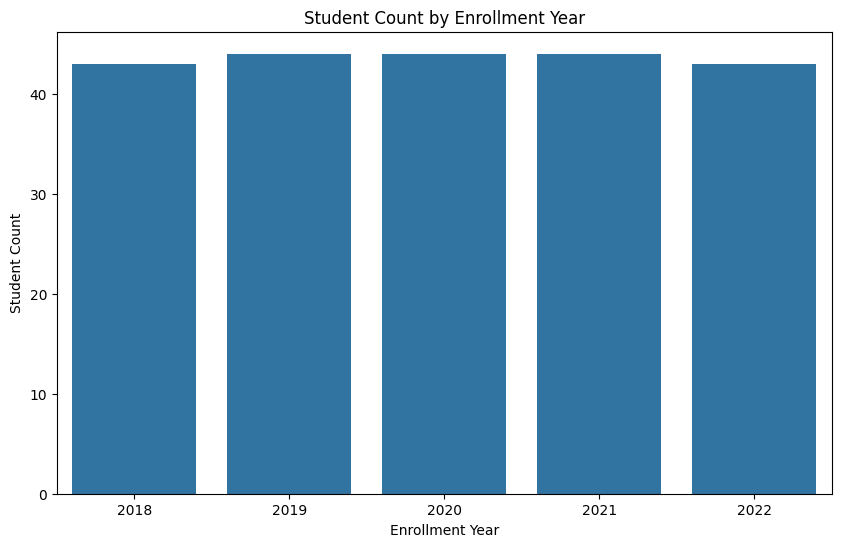


Course Count by Teacher:


,TeacherID,Name,CourseCount
0,200,Jeep mond,1
1,201,Alice Smith,1
2,202,Bob Johnson,1
3,203,Carol Williams,1
4,204,David Brown,1
5,205,Eve Jones,1
6,206,Frank Garcia,1
7,207,Grace Martinez,1
8,208,Henry Rodriguez,1
9,209,Ivy Wilson,1


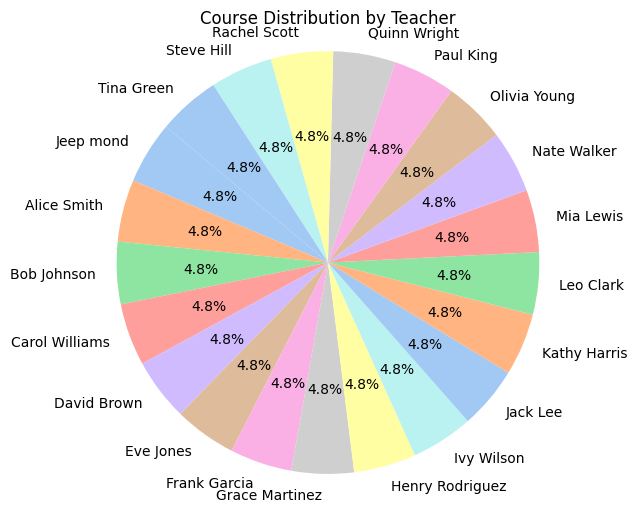


Courses with Teachers:


,CourseID,CourseName,Name
0,104,English Literature,Alice Smith
1,105,World History,Tina Green
2,106,General Chemistry,Mia Lewis
3,108,Introduction to Psychology,Bob Johnson
4,110,Music Theory,Paul King
5,111,Introduction to Drama,David Brown
6,113,Advanced Mathematics,Grace Martinez
7,115,Macroeconomics,Rachel Scott
8,117,Political Science,Eve Jones
9,119,Creative Writing,Jack Lee


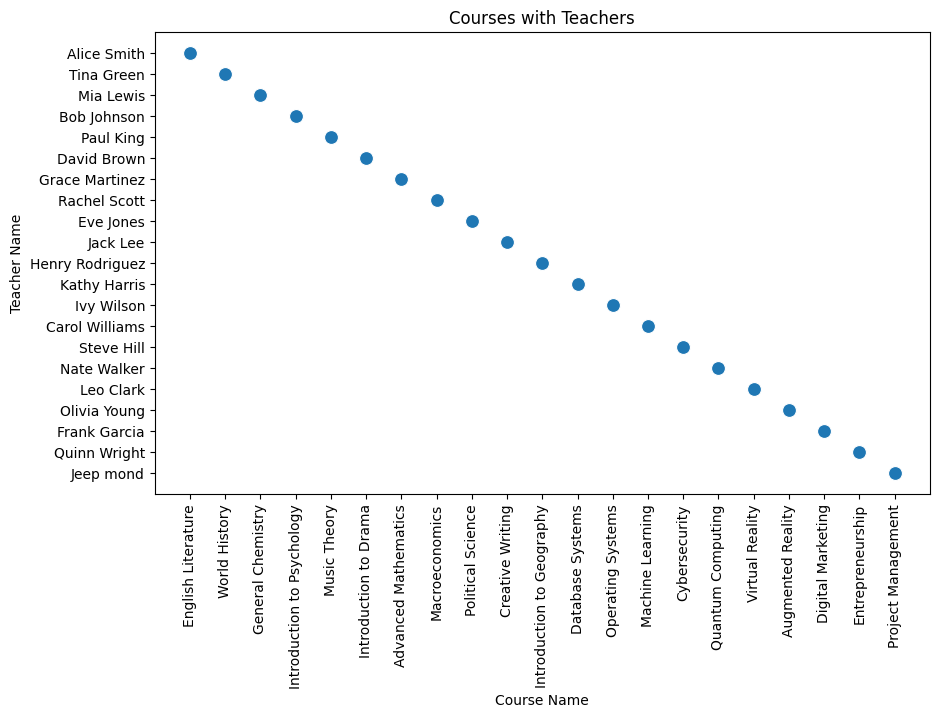


Book Count by Course:


,CourseID,CourseName,BookCount
0,101,Introduction to Computer Science,1
1,102,Data Structures and Algorithms,2
2,103,Calculus I,1
3,104,English Literature,1
4,105,World History,1
5,106,General Chemistry,1
6,107,Physics I,3
7,108,Introduction to Psychology,1
8,109,Art History,1
9,110,Music Theory,1


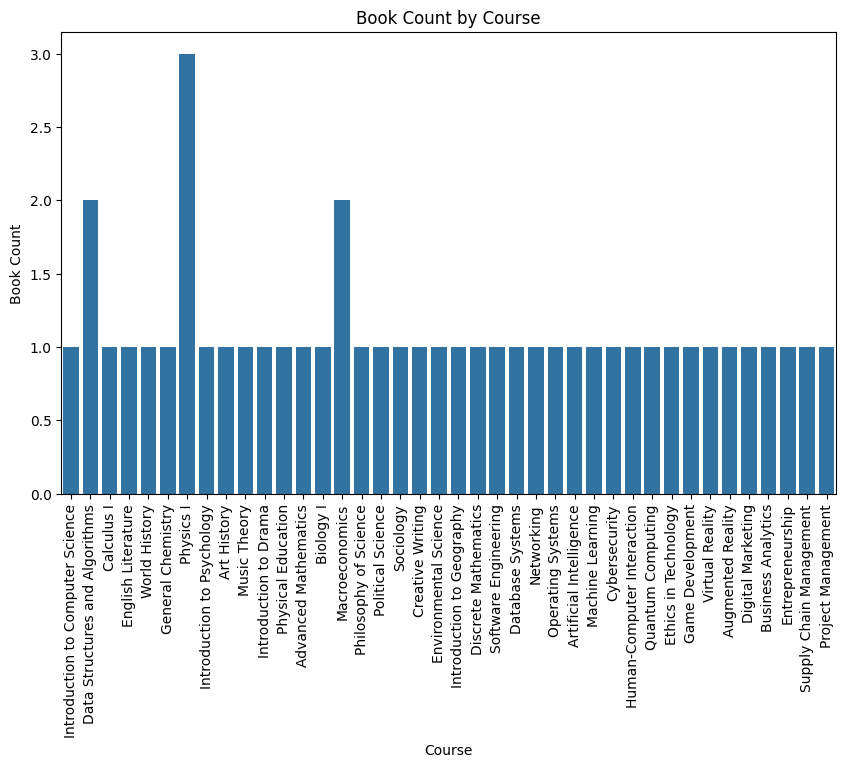

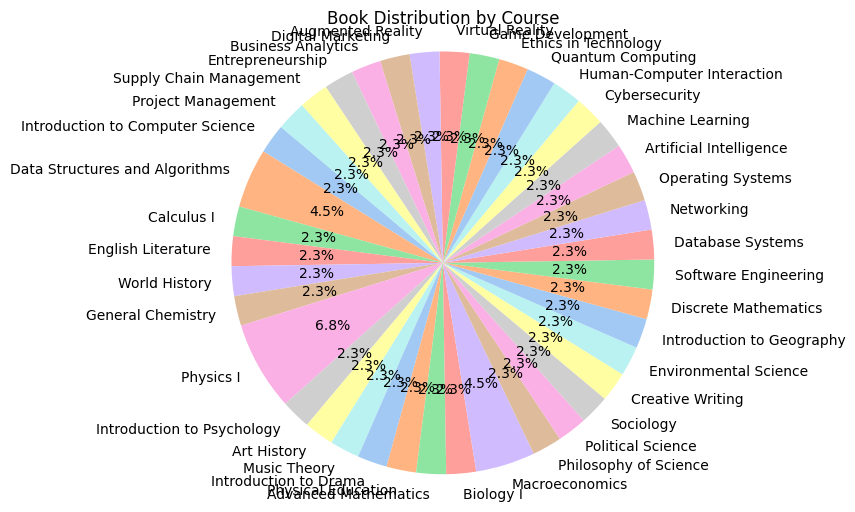


Most Common Student Majors:


,Major,MajorCount
0,CS,56
1,EE,54
2,ME,53
3,CE,53
4,,2


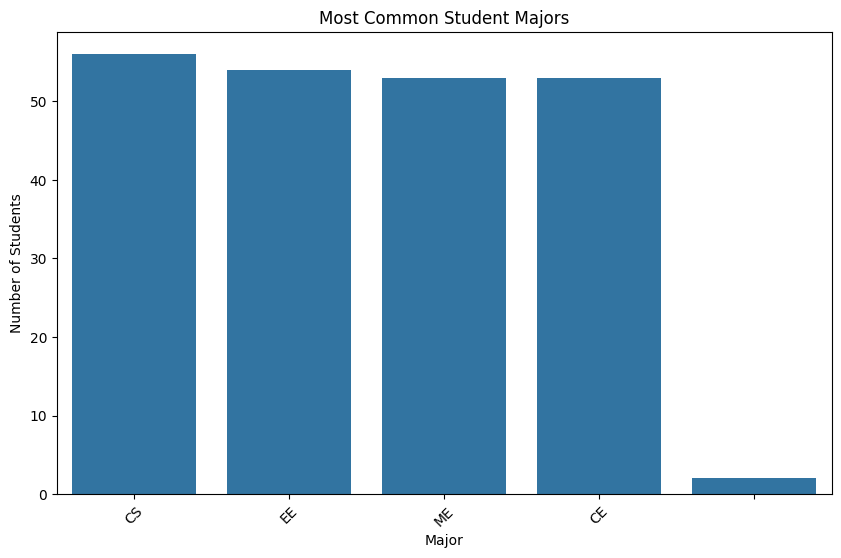

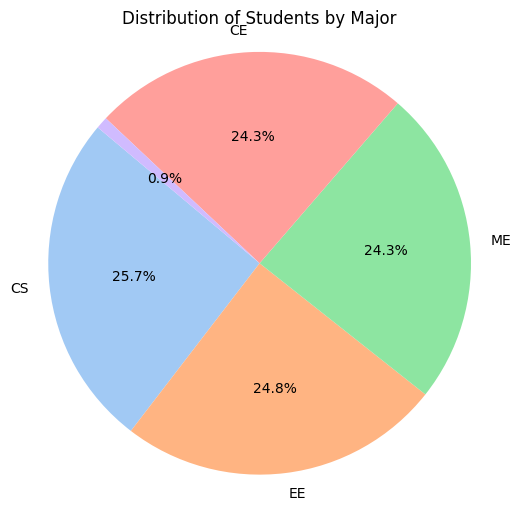


Average Courses Per Teacher:


,AvgCourseCount
0,1.0


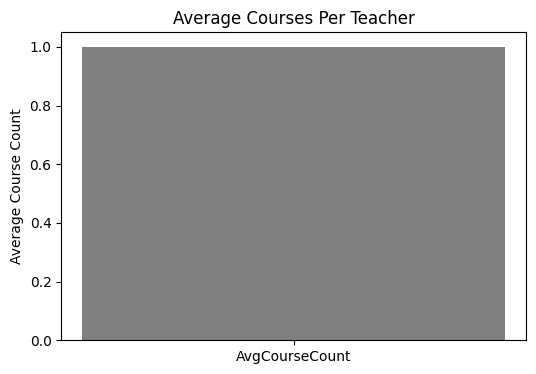

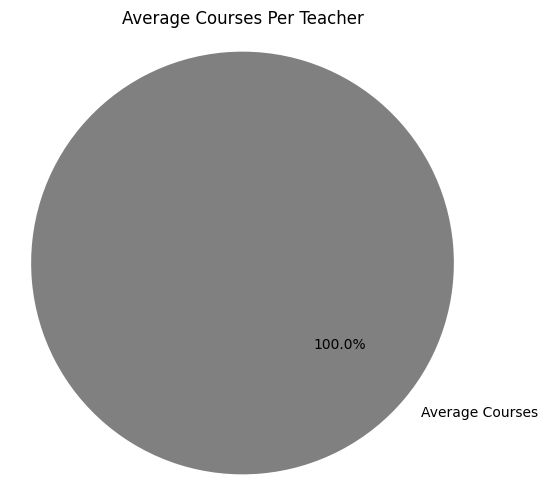

In [7]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('db/student_info_system.db')

# Define functions to perform queries
def studentNumber():
    query = "SELECT COUNT(*) as StudentCount FROM Students"
    df = pd.read_sql_query(query, conn)
    return df

def studentCountByYear():
    query = '''
    SELECT EnrollmentYear, COUNT(*) as StudentCount
    FROM Students 
    GROUP BY EnrollmentYear
    '''
    df = pd.read_sql_query(query, conn)
    return df

def courseCountByTeacher():
    query = '''
    SELECT Teachers.TeacherID, Teachers.Name, COUNT(*) as CourseCount
    FROM Teachers
    JOIN TeacherCourse ON Teachers.TeacherID = TeacherCourse.TeacherID
    GROUP BY Teachers.TeacherID, Teachers.Name
    '''
    df = pd.read_sql_query(query, conn)
    return df

def coursesWithTeachers():
    query = '''
    SELECT Courses.CourseID, Courses.CourseName, Teachers.Name 
    FROM Courses
    JOIN TeacherCourse ON Courses.CourseID = TeacherCourse.CourseID
    JOIN Teachers ON TeacherCourse.TeacherID = Teachers.TeacherID
    '''
    df = pd.read_sql_query(query, conn)
    return df

def bookCountByCourse():
    query = '''
    SELECT Courses.CourseID, Courses.CourseName, COUNT(*) as BookCount
    FROM Courses
    JOIN CourseBooks ON Courses.CourseID = CourseBooks.CourseID
    GROUP BY Courses.CourseID, Courses.CourseName
    '''
    df = pd.read_sql_query(query, conn)
    return df

def mostCommonStudentMajor():
    query = '''
    SELECT Major, COUNT(*) as MajorCount
    FROM Students
    GROUP BY Major
    ORDER BY MajorCount DESC
    LIMIT 5
    '''
    df = pd.read_sql_query(query, conn)
    return df

def averageCoursesPerTeacher():
    query = '''
    SELECT AVG(CourseCount) as AvgCourseCount
    FROM (
        SELECT Teachers.TeacherID, COUNT(*) as CourseCount
        FROM Teachers
        JOIN TeacherCourse ON Teachers.TeacherID = TeacherCourse.TeacherID
        GROUP BY Teachers.TeacherID
    ) AS TeacherCourseCounts
    '''
    df = pd.read_sql_query(query, conn)
    return df

# Get the data
student_num = studentNumber()
student_by_year = studentCountByYear()
course_by_teacher = courseCountByTeacher()
courses_teachers = coursesWithTeachers()
book_by_course = bookCountByCourse()
common_major = mostCommonStudentMajor()
avg_courses_per_teacher = averageCoursesPerTeacher()

# Display the results
# Student Number
print("Student Number:")
display(student_num)

# Student Number Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(student_num['StudentCount'], labels=['Total Students'], autopct='%1.1f%%', startangle=140, colors=['#808080'])
plt.title('Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Student Count by Year
print("\nStudent Count by Year:")
display(student_by_year)

# Student Count by Year Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='EnrollmentYear', y='StudentCount', data=student_by_year)
plt.title('Student Count by Enrollment Year')
plt.xlabel('Enrollment Year')
plt.ylabel('Student Count')
plt.show()

# Course Count by Teacher
print("\nCourse Count by Teacher:")
display(course_by_teacher)

# Course Count by Teacher Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(course_by_teacher['CourseCount'], labels=course_by_teacher['Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Course Distribution by Teacher')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Courses with Teachers
print("\nCourses with Teachers:")
display(courses_teachers)

# Courses with Teachers Chart (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CourseName', y='Name', data=courses_teachers, s=100)
plt.title('Courses with Teachers')
plt.xlabel('Course Name')
plt.ylabel('Teacher Name')
plt.xticks(rotation=90)
plt.show()

# Book Count by Course
print("\nBook Count by Course:")
display(book_by_course)

# Book Count by Course Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='CourseName', y='BookCount', data=book_by_course)
plt.title('Book Count by Course')
plt.xlabel('Course')
plt.ylabel('Book Count')
plt.xticks(rotation=90)
plt.show()

# Book Count by Course Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(book_by_course['BookCount'], labels=book_by_course['CourseName'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Book Distribution by Course')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Most Common Student Major
print("\nMost Common Student Majors:")
display(common_major)

# Most Common Student Major Chart (Bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Major', y='MajorCount', data=common_major)
plt.title('Most Common Student Majors')
plt.xlabel('Major')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

# Most Common Student Major Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(common_major['MajorCount'], labels=common_major['Major'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Students by Major')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Average Courses Per Teacher
print("\nAverage Courses Per Teacher:")
display(avg_courses_per_teacher)

# Average Courses Per Teacher Chart (Bar chart)
plt.figure(figsize=(6, 4))
plt.bar('AvgCourseCount', avg_courses_per_teacher['AvgCourseCount'], color='#808080')
plt.title('Average Courses Per Teacher')
plt.ylabel('Average Course Count')
plt.show()

# Average Courses Per Teacher Pie Chart (medium size)
plt.figure(figsize=(6, 6))
plt.pie(avg_courses_per_teacher['AvgCourseCount'], labels=['Average Courses'], autopct='%1.1f%%', startangle=140, colors=['#808080'])
plt.title('Average Courses Per Teacher')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()
